In [12]:
from cgmbrush.cgmbrush import *
from cgmbrush.plots.plots import *
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Rectangle

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
XBIG_SIZE = 20
axis_fontsize = 20
curve_thickness = 2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=XBIG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

date = '2021-11-01'
res = 32
resolution = 32

u = 100
p = 40 * resolution


def algorithm_stages_plot(raw_field, removed_field, addition_field, final_field, orig_grid_size, vmax, zoom_rect: bool):
    vmin = 0
    fig, axs = fields_comparison_plot( [('Raw density field', raw_field), ('Halos removed', removed_field), ('Halo-associated gas', addition_field), ('Final halo density field', final_field)], vmin, vmax)
    
    if zoom_rect:
        rect = Rectangle((0,0),p,p,linewidth=1,edgecolor='r',facecolor="none")
        axs[3].add_patch(rect)
    
    extra = ''
    if zoom_rect:
        extra = '_wbox'
    filename = 'implot_add_remove_halos_{}{}.pdf'.format(orig_grid_size, extra)
    saveFig(filename, fig, bbox_inches='tight')
    

In [2]:
c = Configuration(SphericalTophatProfile(), 1, resolution=res, provider=BolshoiProvider())
c.datestamp = date
c.run(load_from_files=True)

original_field = c.provider.get_density_field(0, c.den_grid_size)
removed_field = c.get_removed_field()[0]
added_field = c.get_addition_field()[0]
final_field = c.get_final_field()[0]

c512 = Configuration(SphericalTophatProfile(), 1, resolution=res, provider=BolshoiProvider(), den_grid_size=512)
c512.datestamp = date
c512.run(load_from_files=True)

original_field512 = c512.provider.get_density_field(0, c.den_grid_size)
removed_field512 = c512.get_removed_field()[0]
added_field512 = c512.get_addition_field()[0]
final_field512 = c512.get_final_field()[0]


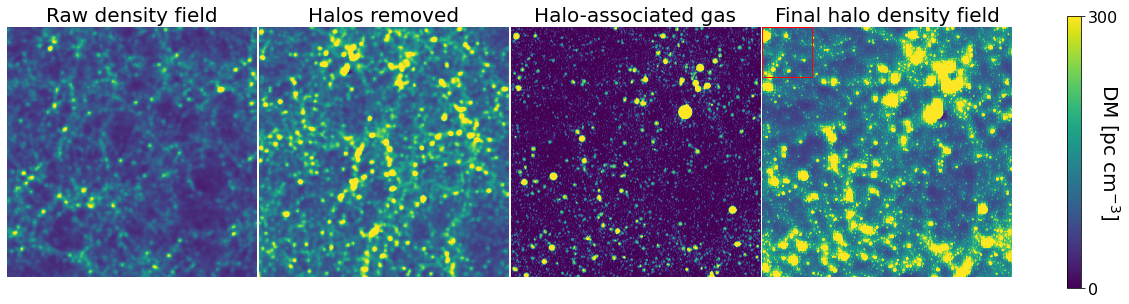

In [13]:
# Make 512 resolution algorithm stages plot with red box for Figure 1
# Zoom in on 140 Mpc
algorithm_stages_plot(original_field512[0:2*u,0:2*u], removed_field512[0:2*u,0:2*u], added_field512[0:2*u*res,0:2*u*res], final_field512[0:2*u*res,0:2*u*res], c512.den_grid_size, 300, True)

In [ ]:
# Make the 256 vs 512 comparison 
# Zoom in on 140 Mpc
algorithm_stages_plot(original_field[0:u,0:u], removed_field[0:u,0:u], added_field[0:u*res,0:u*res], final_field[0:u*res,0:u*res], c.den_grid_size, 300, False)
algorithm_stages_plot(original_field512[0:2*u,0:2*u], removed_field512[0:2*u,0:2*u], added_field512[0:2*u*res,0:2*u*res], final_field512[0:2*u*res,0:2*u*res], c512.den_grid_size, 300, False)


In [5]:
# Get data for the profile comparison of the fields (res 256)

c_STH2 = Configuration(SphericalTophatProfile(), 2, resolution=resolution, provider=BolshoiProvider())
c_STH2.datestamp = date
STH2 = c_STH2.get_final_field()[0]

c_NFW = Configuration(NFWProfile(), 2, resolution=resolution, provider=BolshoiProvider())
c_NFW.datestamp = date
NFW = c_NFW.get_final_field()[0]

c_FIRE = Configuration(FireProfile(), 1, resolution=resolution, provider=BolshoiProvider())
c_FIRE.datestamp = date
FIRE = c_FIRE.get_final_field()[0]

c_P = Configuration(PrecipitationProfile(), 1, resolution=resolution, provider=BolshoiProvider())
c_P.datestamp = date
PRE = c_P.get_final_field()[0]


In [ ]:
# Make bottom part of Figure 1. Comparies 4 CGM profiles. Zooms in a lot.
vmin = 0
vmax = 500
filename = "implot_add_remove_halos_256_all.pdf"

fig, axs = fields_comparison_plot([('NFW', NFW[0:p,0:p]), ('FIRE', FIRE[0:p,0:p]), ('Precipitation', PRE[0:p,0:p]), ('Tophat $2R_{vir}$', STH2[0:p,0:p])], vmin, vmax)
saveFig(filename, fig, bbox_inches='tight')
